In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Non programming\\New folder\\forestfire\\dataset\\Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## Independent And dependent features
X=df.drop('Classes',axis=1)
y=df['Classes']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

## Feature Scaling Or Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -0.81640219, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
        -0.89470108,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         1.8849096 ,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -0.92080071, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         0.48857935,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -0.89470108, -0.98907071]])

## Box Plots To understand Effect Of Standard Scaler

C:\Users\parde\AppData\Local\Temp\ipykernel_20732\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

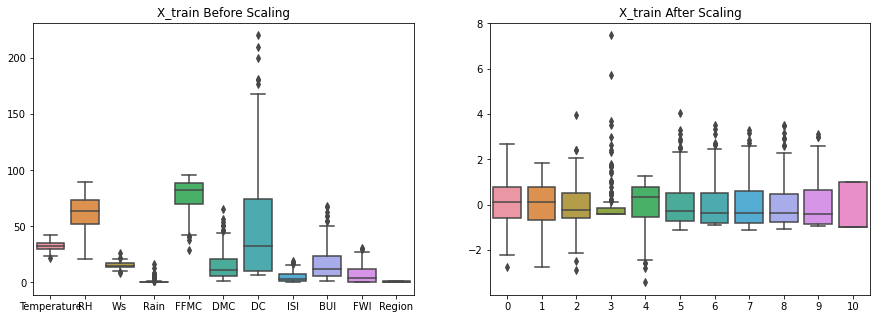

In [18]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Logistics Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
filterwarnings("ignore")

In [20]:
parameters = {
    "penalty": ['l1', 'l2', 'elasticnet' ,None ],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [21]:
clf = GridSearchCV(LogisticRegression(),param_grid=parameters,cv=10,scoring='accuracy')

In [22]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [23]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [24]:
clf.best_score_

0.9780701754385965

In [25]:
ls = LogisticRegression(penalty='l2',solver='newton-cg')

In [26]:
ls.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [27]:
y_pred = ls.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))

[[23  1]
 [ 0 37]]


In [29]:
print(accuracy_score(y_test,y_pred))

0.9836065573770492


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.97      1.00      0.99        37

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



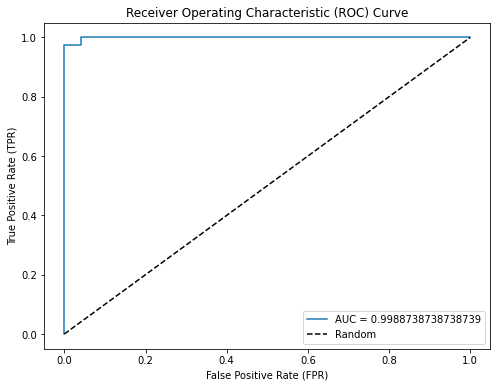

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = ls.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc}')
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [32]:
import pickle 

f = open('C:\\Non programming\\New folder\\forestfire\\Models\\model.pkl','wb')
pickle.dump(ls, f)
f.close()

f = open('C:\\Non programming\\New folder\\forestfire\\Models\\scaler.pkl','wb')
pickle.dump(scaler, f)
f.close()

In [33]:
from sklearn.metrics import recall_score

print(recall_score(y_test,y_pred))

1.0


<Axes: >

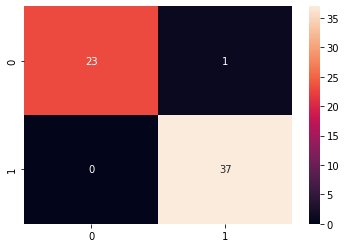

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True)

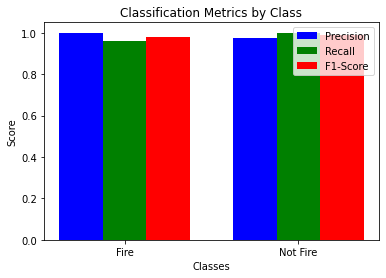

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]  # Exclude 'micro avg', 'macro avg', and 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

bar_width = 0.25
index = np.arange(len(classes))

plt.bar(index, precision, color='b', width=bar_width, label='Precision')
plt.bar(index + bar_width, recall, color='g', width=bar_width, label='Recall')
plt.bar(index + 2 * bar_width, f1_score, color='r', width=bar_width, label='F1-Score')

# Modify x-axis labels
plt.xlabel('Classes')
plt.xticks(index + bar_width, ['Fire', 'Not Fire'])

plt.ylabel('Score')
plt.title('Classification Metrics by Class')
plt.legend()
plt.show()


In [38]:
new = [[30,55,15,80,40,33,115,9,30,15,1]]
new_scaled  = scaler.transform(new)

In [40]:
ls.predict_proba(new_scaled)

array([[1.00000000e+00, 9.73566742e-40]])